# Kaggle competition
## Digit Recognizer

### imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.cross_validation import train_test_split

### Loggin

### Functions

In [4]:
def output(label, num_output=10):
    y = np.zeros(num_output)
    np.put(y, label, 1)
    return y.tolist()
    
def outputLayer(labels, num_output=10):
    return np.array(map(lambda y: output(y), labels))

def nextBatch(inf, sup, step, maxSize):
    if maxSize <= sup + step:
        return (0, step)
    
    return (inf + step, sup + step)

def to_digit(df, idx, i=28, j=28):
    return df.iloc[idx,:].reshape((i, j))

### Datasets

In [5]:
DATA = pd.DataFrame.from_csv("data/train.csv")
DATA = DATA.apply(lambda d: d / 255.0).astype(np.float32)

In [6]:
DATA_TRAIN, DATA_VALID = train_test_split(DATA, test_size=0.20, random_state=42)

In [7]:
DATA_TEST = pd.DataFrame.from_csv("data/test.csv", index_col=None).apply(lambda d: d / 255.0).astype(np.float32)

In [8]:
print "Size of the dataset DATA_TRAIN : %s"%len(DATA_TRAIN)
print "Size of the dataset DATA_VALID : %s"%len(DATA_VALID)

Size of the dataset DATA_TRAIN : 33600
Size of the dataset DATA_VALID : 8400


In [9]:
print "Size of the dataset DATA_TESTS : %s"%len(DATA_TEST)

Size of the dataset DATA_TESTS : 28000


In [10]:
print "List of columns containing Nans: ",filter(lambda y: y != 0, DATA.isnull().sum())

List of columns containing Nans:  []


In [11]:
print "List of columns containing Nans: ",filter(lambda y: y != 0, DATA_TEST.isnull().sum())

List of columns containing Nans:  []


In [12]:
DATA.iloc[:, 0:15].head() # first label 1, 0, 1, 4, 0

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14
label,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
DATA_TRAIN.iloc[:, 0:15].head() # after shuffling 8, 5, 6, 2, 2

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14
label,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
### Example

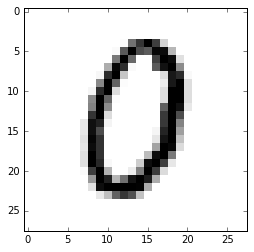

In [15]:
plt.figure(1, figsize=(4, 4))
plt.imshow(to_digit(DATA, 5), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [16]:
# session 

import tensorflow as tf
sess = tf.InteractiveSession()


In [17]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [18]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.initialize_all_variables())

In [19]:
# prediction
y = tf.matmul(x,W) + b

In [20]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

In [21]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Training

In [22]:
step = 100
inf, sup = (0, 100)
dataLenght = len(DATA_TRAIN)

In [23]:
for i in range(100000):
    
    #print "inf : %s, sup: %s -- i : %i"%(inf, sup, i)
    
    train_step.run( feed_dict = {
            x: DATA_TRAIN[inf:sup].as_matrix(),
            y_: outputLayer(DATA_TRAIN.index.tolist()[inf:sup])}
                  )
    
    inf, sup = nextBatch(inf, sup, step, dataLenght)

### Evaluation

In [24]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [25]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
print(accuracy.eval(feed_dict={x: DATA_TRAIN.as_matrix(), y_: outputLayer(DATA_TRAIN.index.tolist())}))

0.943631


###### Prediction on the training test
- [X] accuracy: 0.943631 (80/20) 10000-loops, batch of 100
- [X] accuracy: 0.923677 (90/10) 10000-loops, batch of 100
- [X] accuracy: 0.942333 (100/0) 100000-loops, batch of 100

In [27]:
print(accuracy.eval(feed_dict={x: DATA_VALID.as_matrix(), y_: outputLayer(DATA_VALID.index.tolist())}))

0.910595


###### Prediction on the validation test
- [X] accuracy: 0.910595 (80/20) 10000-loops, batch of 100
- [ ] accuracy: 0.891905 (90/10) 10000-loops, batch of 100
- [ ] ... (100/0) 100000-loops, batch of 100

### Prediction

In [28]:
DATA_TEST.iloc[:, 0:15].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
prediction = tf.arg_max(y,1)

In [30]:
PRED_LABEL = prediction.eval(feed_dict={x: DATA_TEST.as_matrix()})

In [31]:
# writing the result
df_result = pd.DataFrame({'ImageId': range(1, len(PRED_LABEL)+1), 'Label': PRED_LABEL})
df_result.to_csv('data/prediction_two.csv', index=False)